<a href="https://colab.research.google.com/github/damianmajercak/IAU_preprocessing/blob/master/Odovzdanie_2_cast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall scikit-learn -y
!pip install Cython -q
!pip install fancyimpute -q
!pip install category_encoders -q
!pip install datetime --upgrade -q
!pip install git+git://github.com/scikit-learn/scikit-learn.git -q
#now you must restart runtime

Uninstalling scikit-learn-0.19.2:
  Successfully uninstalled scikit-learn-0.19.2


In [659]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import scipy.stats as stats
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import  statsmodels.stats as sm_s
from matplotlib.colors import ListedColormap
import category_encoders as ce
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split 
from datetime import  datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin
from sklearn.neighbors import KNeighborsRegressor
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler, SimpleFill
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing.imputation import Imputer 
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
import sklearn
sklearn.__version__

'0.21.dev0'

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Naciranie datasetov**

In [0]:
other_ds = pd.read_csv('drive/My Drive/IAU projekt/other_train.csv')
personal_ds = pd.read_csv('drive/My Drive/IAU projekt/personal_train.csv')

Funkcia ktorou si vytvorime tabulku, ktora nam bude poskytovat vseobceny nahlad na dataset

In [0]:
def overview_func(dataframe):
  overview = pd.DataFrame()
  overview['Columns'] = dataframe.columns
  overview['numbersOfNaValue'] = dataframe.isna().sum().values
  overview['numbersOfRecords'] = dataframe.count().values
  overview['type'] = dataframe.dtypes.values
  q = []
  unique=[]
  for a in dataframe.columns:
    unique.append(dataframe[a].unique())
    q.append(len(dataframe[a].unique()))
  overview['numbersOfUniqueValue'] = q
  overview['uniqueValue'] = unique
  overview['final'] = False
  for index in overview.index:
    if overview.loc[index,'numbersOfNaValue'] == 0:
      overview.loc[index,'final'] = True;
  return overview

#**Spojenie dvoch datasetov**

In [0]:
class DatasetMerger(BaseEstimator):
    def __init__(self, other_ds):
        self.other_data = other_ds
 
    def fit(self, x, y=None):
        return self

    def transform(self, personal_ds):
        merged_ds = self.other_data.merge(personal_ds,left_on=['name','address'],right_on = ['name','address'])
        merged_ds = merged_ds.drop(columns=['Unnamed: 0_y'])
        merged_ds = merged_ds.drop(columns=['Unnamed: 0_x'])
        return merged_ds

In [0]:
spojeny_ds = DatasetMerger(other_ds).transform(personal_ds)

**Zobrazenie nadhladu na dataframe**

In [0]:
overV = overview_func(spojeny_ds)
overV

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,query hyperthyroid,11,2276,object,4,"[f, t, nan, f.8]",False
3,T4U measured,6,2281,object,4,"[t, f, nan, t.3]",False
4,FTI measured,9,2278,object,4,"[t, f, nan, t.4]",False
5,education,5,2282,object,17,"[ Some-college, HS-grad, 12th, Bachelors, ...",False
6,lithium,14,2273,object,4,"[f, nan, t, f.9]",False
7,TT4,160,2127,float64,206,"[84.0, 96.0, 151.0, nan, 125.0, 103.0, 118.0, ...",False
8,T4U,245,2042,float64,136,"[0.98, 0.8, 1.39, nan, 1.12, 1.16, 1.04, 1.1, ...",False
9,capital-loss,7,2280,float64,39,"[0.0, 2377.0, 1564.0, 1887.0, 1719.0, 2057.0, ...",False


**Sustredime sa momentalne na kategoricke hodnoty**

In [0]:
#nazvy vsetkych kategorickych features
bool_columns = ['query hyperthyroid', 'T4U measured', 'FTI measured', 'lithium', 'on thyroxine', 'tumor',
                'query hypothyroid', 'sick', 'thyroid surgery', 'I131 treatment',
                'TT4 measured', 'goitre', 'TSH measured', 'hypopituitary', 'query on thyroxine', 'T3 measured',
               'on antithyroid medication','pregnant','psych']
boolColWithSex = bool_columns.copy()
boolColWithSex.append('sex')

In [0]:
overview_func(spojeny_ds[boolColWithSex])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,query hyperthyroid,11,2276,object,4,"[f, t, nan, f.8]",False
1,T4U measured,6,2281,object,4,"[t, f, nan, t.3]",False
2,FTI measured,9,2278,object,4,"[t, f, nan, t.4]",False
3,lithium,14,2273,object,4,"[f, nan, t, f.9]",False
4,on thyroxine,9,2278,object,3,"[f, t, nan]",False
5,tumor,7,2280,object,4,"[f, t, nan, f.11]",False
6,query hypothyroid,4,2283,object,4,"[f, t, nan, f.7]",False
7,sick,8,2279,object,4,"[f, t, nan, f.3]",False
8,thyroid surgery,7,2280,object,4,"[f, nan, t, f.5]",False
9,I131 treatment,5,2282,object,4,"[f, t, nan, f.6]",False


**Opravenie chyby** **kategorickych hodnod** 

---

Vidime ze pri zadavani hodnot pre booleanovske kategoricke atributy nastali najeke preklepy. 

Riesenie vsetky hodnoty ktore zacinaju na t nahradime na TRUE tie ktore zacinaju na  f nahradime False a otazniky nahradime np.nan

Taktiez sa chcem zbavit otaznikov pri pohlavi.


In [0]:
class BooleanFormatCorrector(BaseEstimator):  
    def __init__(self, columns):
        self.columns = columns
    
    def correct_sex(self,value):
      if type(value) == type('str'):
        if value.startswith('?'):
            return float('nan')
        elif value.lower().strip().startswith('m'):
            return 'M'
        elif value.lower().strip().startswith('f'):
            return 'F'
        else:
          return np.nan
      else:
        return np.nan
  
    def correct_value(self,value):
      if type(value) == type('str'):
        if value.startswith('?'):
            return float('nan')
        elif value.lower().startswith('t'):
            return 'True'
        elif value.lower().startswith('f'):
            return 'False'
        else:
          return np.nan
      else:
        return np.nan

    def fit(self, x, y=None):
        return self
    
    def transform(self, dataframe):
        for column_name in self.columns:
          if(column_name == 'sex'):
            dataframe[column_name] = dataframe[column_name].map(self.correct_sex)
          else: 
            dataframe[column_name] = dataframe[column_name].map(self.correct_value)
        return dataframe

In [0]:
spojeny_ds = BooleanFormatCorrector(boolColWithSex).transform(spojeny_ds)
overview_func(spojeny_ds[boolColWithSex])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,query hyperthyroid,11,2276,object,3,"[False, True, nan]",False
1,T4U measured,6,2281,object,3,"[True, False, nan]",False
2,FTI measured,9,2278,object,3,"[True, False, nan]",False
3,lithium,14,2273,object,3,"[False, nan, True]",False
4,on thyroxine,9,2278,object,3,"[False, True, nan]",False
5,tumor,7,2280,object,3,"[False, True, nan]",False
6,query hypothyroid,4,2283,object,3,"[False, True, nan]",False
7,sick,8,2279,object,3,"[False, True, nan]",False
8,thyroid surgery,7,2280,object,3,"[False, nan, True]",False
9,I131 treatment,5,2282,object,3,"[False, True, nan]",False


**Podme sa pozriet na kategoricke stlpce**

In [0]:
overview_func(spojeny_ds[[value for value in spojeny_ds.select_dtypes(object) if value not in boolColWithSex]])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,education,5,2282,object,17,"[ Some-college, HS-grad, 12th, Bachelors, ...",False
3,FTI,5,2282,object,200,"[86, 121, 109, ?, 93, 102, 80, 94, 120, 73, 15...",False
4,relationship,11,2276,object,7,"[ Not-in-family, Husband, Unmarried, Own-ch...",False
5,class,9,2278,object,2238,"[negative.|605, negative.|2434, negative.|1047...",False
6,personal_info,6,2281,object,579,"[?|United-States\nNever-married -- ?|White, Cr...",False
7,referral source,6,2281,object,11,"[other, SVI, SVHD, SVHC, sVI, Other, sVHC, STM...",False
8,TBG measured,5,2282,object,3,"[f, nan, f.14]",False
9,TBG,5,2282,object,2,"[?, nan]",False


** TBG measured** ma iba prazdne hodnoty a false co znamena ze pre budcnost tento stplce nema pre nas zmysel. taktiez stlpec TBG

---

**Odstarenie stlpcov TBG a TBG measured**

In [0]:
class ColumnsRemover(BaseEstimator):  
  def __init__(self, columns):
    self.column = columns
 
  def fit(self, x, y=None):
    return self
    
  def transform(self, dataframe):
    return dataframe.drop(self.column, axis=1)

In [0]:
spojeny_ds = ColumnsRemover(['TBG','TBG measured']).transform(spojeny_ds)

In [0]:
overview_func(spojeny_ds[[value for value in spojeny_ds.select_dtypes(object) if value not in boolColWithSex]])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,education,5,2282,object,17,"[ Some-college, HS-grad, 12th, Bachelors, ...",False
3,FTI,5,2282,object,200,"[86, 121, 109, ?, 93, 102, 80, 94, 120, 73, 15...",False
4,relationship,11,2276,object,7,"[ Not-in-family, Husband, Unmarried, Own-ch...",False
5,class,9,2278,object,2238,"[negative.|605, negative.|2434, negative.|1047...",False
6,personal_info,6,2281,object,579,"[?|United-States\nNever-married -- ?|White, Cr...",False
7,referral source,6,2281,object,11,"[other, SVI, SVHD, SVHC, sVI, Other, sVHC, STM...",False
8,date_of_birth,1,2286,object,2183,"[2003/09/23, 1993-08-11 00 00 00, 2001-02-22, ...",False


**Atribut FTI**

---

stlpec ma typ object pretoze medzi hodnotami obsahuje aj otazniky
musime sa zbavit otaznikov a nahradit ich np nan hodnotami  a pretypovat stlpec na float

In [0]:
class NumerValueFromObjecetToFloat(BaseEstimator):
  def __init__(self, columns):
    self.column = columns
 
  def fit(self, x, y=None):
    return self
  
  def try_convert_float(self,a):
    if type(a) == type('str'):
      if a =='?':
        return np.nan
      else:
        try:
          return float(a)
        except ValueError:
          return np.nan
          pass
    else:
      try:
        return float(a)
      except ValueError:
        return np.nan
    raise ValueError('no valid format found') 
      
  
  def transform(self, dataframe):
    for col in self.column:
      
      dataframe[col] = dataframe[col].map(self.try_convert_float).astype('Float64')
    return dataframe

In [0]:
spojeny_ds = NumerValueFromObjecetToFloat(['FTI']).transform(spojeny_ds)
overview_func(spojeny_ds[[value for value in spojeny_ds.select_dtypes(object) if value not in boolColWithSex]])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,education,5,2282,object,17,"[ Some-college, HS-grad, 12th, Bachelors, ...",False
3,relationship,11,2276,object,7,"[ Not-in-family, Husband, Unmarried, Own-ch...",False
4,class,9,2278,object,2238,"[negative.|605, negative.|2434, negative.|1047...",False
5,personal_info,6,2281,object,579,"[?|United-States\nNever-married -- ?|White, Cr...",False
6,referral source,6,2281,object,11,"[other, SVI, SVHD, SVHC, sVI, Other, sVHC, STM...",False
7,date_of_birth,1,2286,object,2183,"[2003/09/23, 1993-08-11 00 00 00, 2001-02-22, ...",False


**referral source**

---

vidime ze stlpec kvoli nedodrzaniu velkosti pismen obsahuje omnoho viac kategorii

Riesenie upravit vsetky hodnoty v referal source na velke pismena

In [0]:
class CaseSensitiveFormatCorrector(BaseEstimator):  
    def __init__(self, columns):
        self.columns = columns
  
    def correct_valuee(self,value):
      if type(value) == type('str'):
        if value.startswith('?'): 
            return np.nan
        else:
          return value.upper()
      else:
        return np.nan

    def fit(self, x, y=None):
        return self
    
    def transform(self, dataframe):
        for column_name in self.columns:
            dataframe[column_name] = dataframe[column_name].map(self.correct_valuee)
        return dataframe

In [0]:
spojeny_ds = CaseSensitiveFormatCorrector(['referral source']).transform(spojeny_ds)
overview_func(spojeny_ds[[value for value in spojeny_ds.select_dtypes(object) if value not in boolColWithSex]])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,education,5,2282,object,17,"[ Some-college, HS-grad, 12th, Bachelors, ...",False
3,relationship,11,2276,object,7,"[ Not-in-family, Husband, Unmarried, Own-ch...",False
4,class,9,2278,object,2238,"[negative.|605, negative.|2434, negative.|1047...",False
5,personal_info,6,2281,object,579,"[?|United-States\nNever-married -- ?|White, Cr...",False
6,referral source,6,2281,object,6,"[OTHER, SVI, SVHD, SVHC, STMW, nan]",False
7,date_of_birth,1,2286,object,2183,"[2003/09/23, 1993-08-11 00 00 00, 2001-02-22, ...",False


**date_of_birth**

---

nejednotny format datumov

In [0]:
class DateCorrector(BaseEstimator):
  def __init__(self, columns):
    self.columns = columns
  
  def fit(self, x, y=None):
    return self
 
  def try_parsing_date(self,text):
    template = ['%Y-%m-%d', '%d.%m.%Y', '%d/%m/%Y','%Y-%m-%d %H %M %S','%Y-%m-%d %H:%M:%S','%Y/%m/%d','%y/%m/%d','%y-%m-%d']
    for fmt in template:
        if (type(text)==float):
          return np.nan
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')
  
  def transform(self, dataframe):
    dataframe[self.columns] = dataframe[self.columns].map(self.try_parsing_date)
    return dataframe

In [0]:
spojeny_ds = DateCorrector('date_of_birth').transform(spojeny_ds)


In [0]:
overview_func(spojeny_ds[[value for value in spojeny_ds.select_dtypes(object) if value not in boolColWithSex]])


,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,education,5,2282,object,17,"[ Some-college, HS-grad, 12th, Bachelors, ...",False
3,relationship,11,2276,object,7,"[ Not-in-family, Husband, Unmarried, Own-ch...",False
4,class,9,2278,object,2238,"[negative.|605, negative.|2434, negative.|1047...",False
5,personal_info,6,2281,object,579,"[?|United-States\nNever-married -- ?|White, Cr...",False
6,referral source,6,2281,object,6,"[OTHER, SVI, SVHD, SVHC, STMW, nan]",False
7,date_of_birth,1,2286,object,2146,"[2003-09-23 00:00:00, 1993-08-11 00:00:00, 200...",False


**class ,   personal_info,  address**

---
Rozprasovanie tychto atributov do viacerych stlpcov


In [0]:
class ParseColumn(BaseEstimator): 
  def __init__(self, column,delimiter):
    self.column = column
    self.parseColumn = self.column[0]
    self.newCol = self.column[1:]
    self.delimiter = delimiter
  
  def fit(self, x, y=None):
    return self
  
  def correct(self,x):
    if type(x) == type('str'):
      if x.strip(' ') == 'nan':
        return np.nan
      if x.strip() == '?':
        return np.nan
      else:
        return x.strip(' ')
    else:
     #print(x)
      return np.nan
  
  
  def transform(self, ds):
    dataframe=ds.copy()
    for dem in self.delimiter:
      dataframe[self.column[0]] = dataframe[self.column[0]].map(lambda x: x.replace(dem,'|') if type(x) == type('str') else np.nan)
    
    
    for a in range(len(self.newCol)):
      #print(self.newCol[a],a)
      ds[self.newCol[a]] = dataframe[self.column[0]].astype('str').str.split('|',expand = True)[a].map(self.correct)
    return ds
    

In [0]:
spojeny_ds = ParseColumn(['class','className','classNumber'],['|']).transform(spojeny_ds)
spojeny_ds = ParseColumn(['personal_info','occupation','personalState','marital-status','employmentSector','race'],['|','\n','--','|']).transform(spojeny_ds)
spojeny_ds = ParseColumn(['address','city','state'],['\n']).transform(spojeny_ds)
spojeny_ds = ParseColumn(['name','FirstName','LastName'],[' ']).transform(spojeny_ds)
spojeny_ds = ParseColumn(['state','stateName','stateCode'],[',']).transform(spojeny_ds)


##Duplicity

In [0]:
overview_func(spojeny_ds[['name','address']])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2287,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2287,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True


Celkovy pocet riadkov je 2287 ale pocet unikatnych mien je 2236 taktiez aj pocet unikatnych addries je blizko tomuto poctu

pozrieme sa na duplicity

In [0]:
temp = spojeny_ds.groupby(['name','address']).size().reset_index(name = 'counts')
temp[temp.counts>1][['name','address']].shape

(48, 2)

**Mame 48 duplicitnych riadkov na zaklade mena a adresy**

---

pri odstraneni duplicit je velmi potrebne sa pozriet aj na ostatne atributy. Pretoze duplicitne riadky podla adresy a mena nemaju rovnako vyplnene vsetky atributy a preto je potrebne najist sposob akym vyberieme hodnoty atributom. Ak sa jenda o kategoricky atribut bude to najcastejsia hodnota. Avsak ak pojde o ciselny atribut mozme zvoli mean alebo median alebo taktiez najcastejsiu hodnotu


In [0]:
class Duplicit(BaseEstimator):  
  def __init__(self, columns,function):
    self.columns = columns
    self.function = function
 
  def fit(self, x, y=None):
    return self
  
  def identify(self, dataframe):
    temp = dataframe[self.columns].groupby(self.columns).size().reset_index(name='counts')
    return temp[temp['counts'] > 1][self.columns]
    
  def transform(self, dataframe):
    duplicit_values = self.identify(dataframe)
    for entry in duplicit_values.values:
      #duplicit_values obashuje 2 stlpce meno a adresu ktore su duplicitne
      selected = dataframe
      for i in range(len(self.columns)):
        selected = selected[selected[self.columns[i]] == entry[i]]
      dataframe = dataframe.drop(selected.index)
      #selected obsahuju riadky pre dane meno a adresu, ktore su duplicitne
      onAppend = []   
      for i in range(len(selected.columns)):
        if(selected[selected.columns[i]].dtypes.name == 'object'):
          if (int(len(selected[selected.columns[i]].value_counts())) > 0):
            onAppend.append(selected[selected.columns[i]].value_counts().index[0])
          else:
            onAppend.append(np.nan)
                            
        elif (selected[selected.columns[i]].dtypes.name == 'float64'):              
          if (self.function == 'mean'):
            try:
              onAppend.append(selected[selected.columns[i]].mean())
            except ValueError:
                if (int(len(selected[selected.columns[i]].value_counts())) > 0):
                  onAppend.append(selected[selected.columns[i]].value_counts().index[0])
                else:
                  onAppend.append(np.nan)
          elif(self.function == 'median'):
            try:
              onAppend.append(selected[selected.columns[i]].median())
            except ValueError:
                if (int(len(selected[selected.columns[i]].value_counts())) > 0):
                  onAppend.append(selected[selected.columns[i]].value_counts().index[0])
                else:
                  onAppend.append(np.nan)
                  
          else:
              if (int(len(selected[selected.columns[i]].value_counts())) > 0):
                onAppend.append(selected[selected.columns[i]].value_counts().index[0])
              else:
                  onAppend.append(np.nan)
      #print(onAppend)
      if int(len(onAppend)) > 0:
        a = pd.DataFrame([onAppend], columns=dataframe.columns)
        #print(a)
        #print(dataframe.shape)
        dataframe = dataframe.append(a,ignore_index=True)
        #print(dataframe.shape)
    return dataframe  

In [0]:
spojeny_ds = Duplicit(['name','address'],'mean').transform(spojeny_ds)

## Review na dataframe po odstraneni hodnot

In [0]:
overview_func(spojeny_ds)

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2237,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2237,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,query hyperthyroid,0,2237,object,2,"[False, True]",True
3,T4U measured,0,2237,object,2,"[True, False]",True
4,FTI measured,1,2236,object,3,"[True, False, nan]",False
5,education,0,2237,object,16,"[ Some-college, HS-grad, 12th, Bachelors, ...",True
6,lithium,1,2236,object,3,"[False, True, nan]",False
7,TT4,149,2088,float64,206,"[84.0, 96.0, 151.0, nan, 125.0, 103.0, 118.0, ...",False
8,T4U,236,2001,float64,138,"[0.98, 0.8, 1.39, nan, 1.12, 1.16, 1.04, 1.1, ...",False
9,capital-loss,0,2237,float64,38,"[0.0, 2377.0, 1564.0, 1887.0, 1719.0, 2057.0, ...",True


**Education  - education num**

---

tieto dva atributy urcite spolu suvisia.education ma 16 unikatnych hodnot kdezto education num 43

---

riesenie najcastejsia hodnota pre danu triedu

In [0]:
class MostFrequentInClusters(TransformerMixin):
  def __init__(self,columns,all):
        self.columns = columns
        self.means = []
        self.all = all
  def fit(self, X, y=None):
      self.edNum = X.groupby(self.columns).size().reset_index(name="Time").sort_values(['Time',self.columns[-1]],ascending=False)
      #print(self.edNum)
      self.edNum=self.edNum[~self.edNum.duplicated(self.columns[:-1])]
      self.edNum = self.edNum.reset_index()
      #print(self.edNum)
      return self


  def transform(self, X):
      for a in range(len(self.edNum)):
        ind = X.index
        #print("vonkajsi")
        #najdem indexy ktore vyhovuju nazvu prveho
        for col in self.columns[:-1]:
         #print(col)
          ind = X[X.index.isin(ind) & (X[col] == self.edNum[col].loc[a])].index
        if(all):
          ind = ind
        else:
          ind=X[X.index.isin(ind) & (X[self.columns[-1]].isnull())].index
        X.loc[ind,self.columns[-1]] = self.edNum[self.columns[-1]].loc[a]
      return X

In [0]:
spojeny_ds = MostFrequentInClusters(['education','education-num'],True).fit_transform(spojeny_ds)
overview_func(spojeny_ds[['education','education-num']])

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,education,0,2237,object,16,"[ Some-college, HS-grad, 12th, Bachelors, ...",True
1,education-num,0,2237,float64,16,"[10.0, 9.0, 8.0, 13.0, 6.0, 4.0, 14.0, 7.0, 5....",True


odstranili sme tym aj nan hodnoty v education num a pocet unikatnych hodnot je teraz rovnaky pre oba stlpce

**Tehotny muzi**

In [0]:
  spojeny_ds[(spojeny_ds.sex == 'M') & (spojeny_ds.pregnant.isnull())].shape
 

(81, 52)

Mame 81 riadkov kde je pohlavie urcene na hodnotu M-->male-> a chyba hodnota v atribute pregnant

In [0]:
class Pregnancy(BaseEstimator):
  def __init__(self,man):
      self.man = man
  def fit(self, x, y=None):
    return self
    
  def transform(self,merged):
    index=merged[merged.sex == self.man].index
    merged.loc[index,'pregnant'] = 'False'
    return merged

In [0]:
spojeny_ds = Pregnancy('M').transform(spojeny_ds)

In [0]:
overview_func(spojeny_ds)


,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2237,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2237,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,query hyperthyroid,0,2237,object,2,"[False, True]",True
3,T4U measured,0,2237,object,2,"[True, False]",True
4,FTI measured,1,2236,object,3,"[True, False, nan]",False
5,education,0,2237,object,16,"[ Some-college, HS-grad, 12th, Bachelors, ...",True
6,lithium,1,2236,object,3,"[False, True, nan]",False
7,TT4,149,2088,float64,206,"[84.0, 96.0, 151.0, nan, 125.0, 103.0, 118.0, ...",False
8,T4U,236,2001,float64,138,"[0.98, 0.8, 1.39, nan, 1.12, 1.16, 1.04, 1.1, ...",False
9,capital-loss,0,2237,float64,38,"[0.0, 2377.0, 1564.0, 1887.0, 1719.0, 2057.0, ...",True


In [0]:
spojeny_ds = MostFrequentInClusters(['stateName','personalState'],False).fit_transform(spojeny_ds)
spojeny_ds = MostFrequentInClusters(['relationship','marital-status'],False).fit_transform(spojeny_ds)

In [0]:
overview_func(spojeny_ds)

,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2237,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2237,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,query hyperthyroid,0,2237,object,2,"[False, True]",True
3,T4U measured,0,2237,object,2,"[True, False]",True
4,FTI measured,1,2236,object,3,"[True, False, nan]",False
5,education,0,2237,object,16,"[ Some-college, HS-grad, 12th, Bachelors, ...",True
6,lithium,1,2236,object,3,"[False, True, nan]",False
7,TT4,149,2088,float64,206,"[84.0, 96.0, 151.0, nan, 125.0, 103.0, 118.0, ...",False
8,T4U,236,2001,float64,138,"[0.98, 0.8, 1.39, nan, 1.12, 1.16, 1.04, 1.1, ...",False
9,capital-loss,0,2237,float64,38,"[0.0, 2377.0, 1564.0, 1887.0, 1719.0, 2057.0, ...",True


In [0]:
pipDef = Pipeline([
    ['SpojenieDatasetov',DatasetMerger(other_ds)],
    ['OpravenieBooleanASexAtributov',BooleanFormatCorrector(boolColWithSex)],
    ['OdstranenieTBG',ColumnsRemover(['TBG','TBG measured'])],
    ['ZmenaHodnotNaVelkePismena',CaseSensitiveFormatCorrector(['referral source'])],
    ['DatumNarodeniaDoJednotnehoFormatu',DateCorrector('date_of_birth')],
    ['RozparsovanieAtributuClass',ParseColumn(['class','className','classNumber'],['|'])],
    ['RozparsovanieAtributuPersonal_info',ParseColumn(['personal_info','occupation','personalState','marital-status','employmentSector','race'],['|','\n','--','|'])],
    ['RozparsovanieAtributuAddress',ParseColumn(['address','city','state'],['\n'])],
    ['RozparsovanieAtributustate',ParseColumn(['state','stateName','stateCode'],[','])],
    ['RozprarsovanieAtributuName',ParseColumn(['name','FirstName','LastName'],[' '])],
    ['OdstranenieDuplicit',Duplicit(['name','address'],'mean')],
    ['NahradenieNajcastejsouHodnotouvClastri-educationNum',MostFrequentInClusters(['education','education-num'],True)],
    ['VyplnenieAtributuPregnantMuzum',Pregnancy('M')],
    ['VyplnenieRodinnehoVztahuNaZakladeVztahu',MostFrequentInClusters(['relationship','marital-status'],False)],
    ['VyplneniePohlaviaPodlaKrstnehoMena',MostFrequentInClusters(['FirstName','sex'],False)],
    ['OdstranenieOtaznikovZciselnychAtributov',NumerValueFromObjecetToFloat(['FTI'])],
    #['Transformacia',PowerTrans(['TSH','TT4','T4U','T3','age','fnlwgt'],2,True,100,10)],
])
merged = pipDef.fit_transform(personal_ds)

# Doplnanie Hodnot 

## Transformacie

Pozrieme si distrubucie jednotlivych ciselnych hormonov

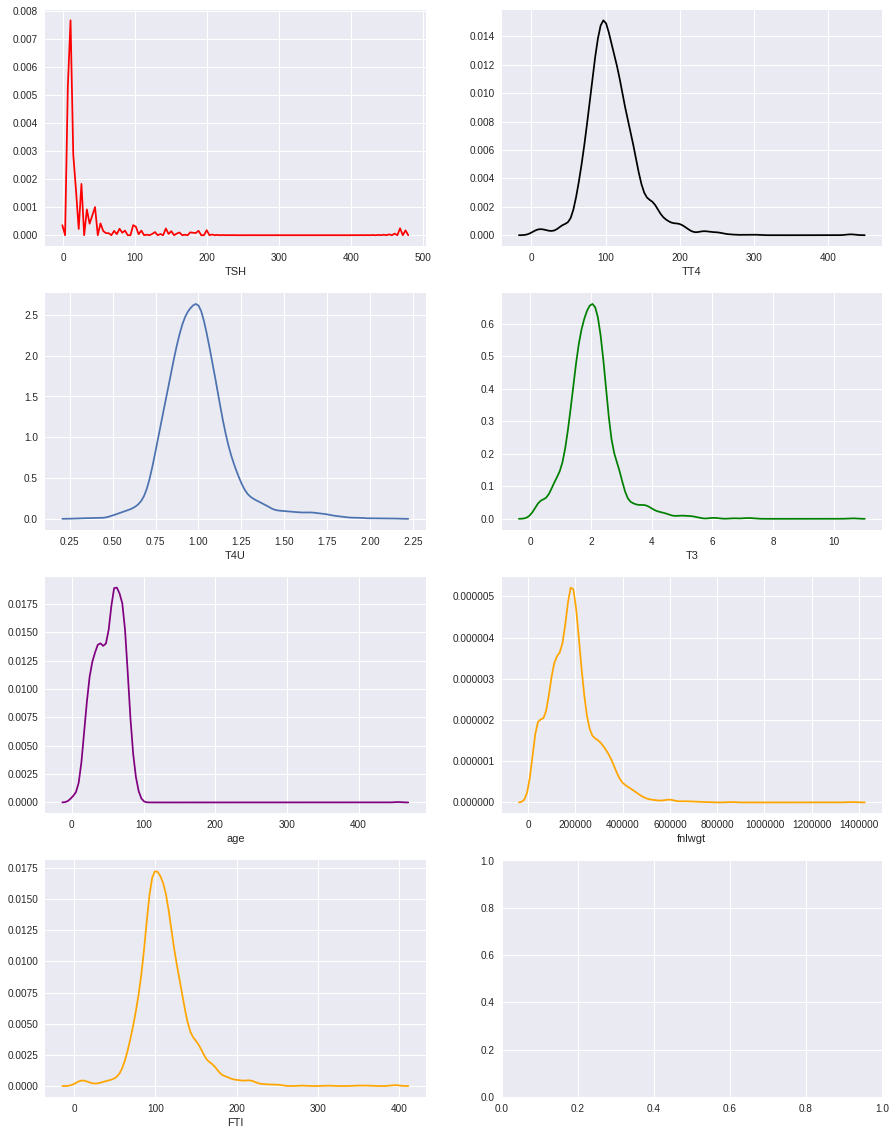

In [0]:

f, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=False,sharey=False)
sns.distplot(merged.TSH.dropna(),ax=axes[0,0],rug=False,hist =False,color = 'red')
sns.distplot(merged.TT4.dropna(),ax=axes[0,1],rug=False,hist = False,color = 'black')
sns.distplot(merged.T4U.dropna(),ax=axes[1,0],rug=False,hist = False)
sns.distplot(merged.T3.dropna(),ax=axes[1,1],rug=False,hist = False,color='green')
sns.distplot(merged.age.dropna(),ax=axes[2,0],rug=False,hist = False,color='purple')
sns.distplot(merged.fnlwgt.dropna(),ax=axes[2,1],rug=False,hist = False,color='orange')
sns.distplot(merged.FTI.dropna(),ax=axes[3,0],rug=False,hist = False,color='orange')

Urobime box Cox transformaciu kvoli normalovemu rozdeleniu

In [0]:
# paramter fun 0 = box-cox  paramter 1 = yeo-johnson 2 - quantile transformacia
# n_qauntile na kolko kvantilov sa rozdeli
# random_state je seed pre random generator
class PowerTrans(TransformerMixin):
  def __init__(self,columns,func,standardize,n_quantiles,random_state):
    self.columns = columns
    self.func = func
    self.stand = standardize
    self.random_state = random_state
    self.n_quantiles=n_quantiles
    
    self.function = ['box-cox','yeo-johnson','quantileTrans']
  def fit(self, X, y=None):
      self.boxcox=pd.DataFrame(columns=X.columns)
      for col in self.columns:
        if self.func==0:
          pt=preprocessing.PowerTransformer(method=self.function[0], standardize=self.stand)
        elif self.func==1:
           pt=preprocessing.PowerTransformer(method=self.function[1], standardize=self.stand)
        elif self.func == 2:
           pt = QuantileTransformer(n_quantiles=self.n_quantiles, random_state=self.random_state,output_distribution='normal')
        self.boxcox[col].loc[0]= pt
        self.boxcox[col].loc[0].fit(np.array(X[col]).reshape(-1,1))
      return self
  def transform(self, X_ds):
    X = X_ds.copy()
    for col in self.columns:
      X.loc[X.index,col]= pd.Series(self.boxcox[col].loc[0].transform(np.array(X[col]).reshape(-1,1)).reshape(1,-1)[0])
    return X

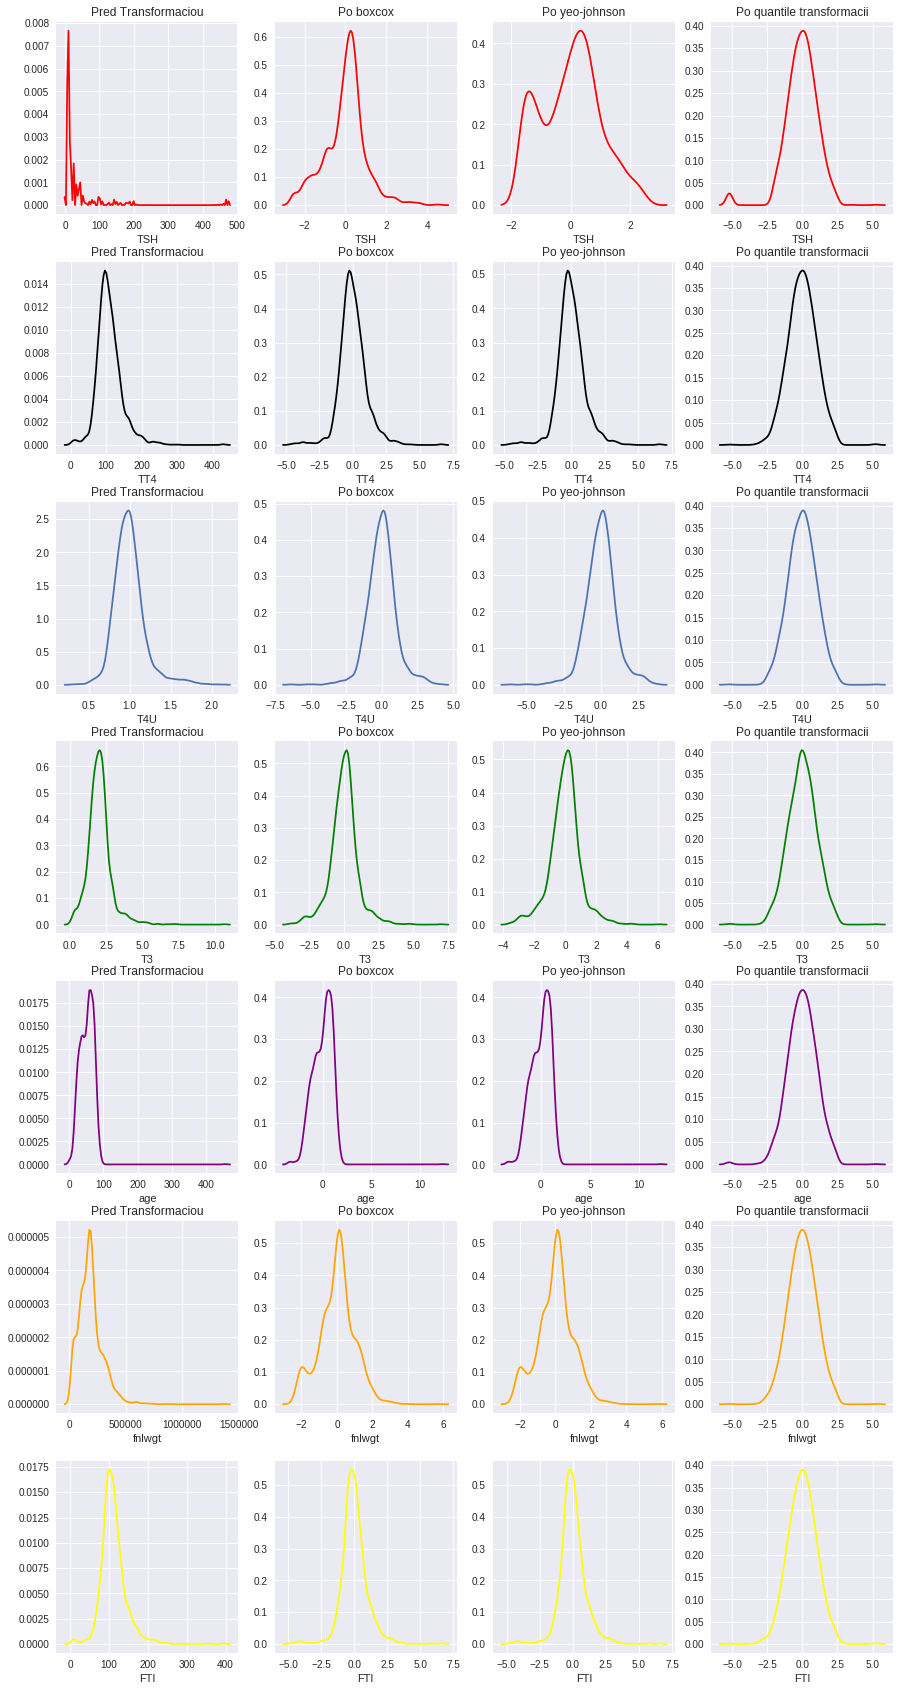

In [0]:
merged2 = PowerTrans(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],0,True,1,0).fit_transform(merged)
f, axes = plt.subplots(7, 4, figsize=(15, 30), sharex=False,sharey=False)
for i in range(6):
  axes[i,0].set_title('Pred Transformaciou')
  axes[i,1].set_title('Po boxcox')
  axes[i,2].set_title('Po yeo-johnson')
  axes[i,3].set_title('Po quantile transformacii')
f.subplots_adjust(hspace = 0.25)
sns.distplot(merged.TSH.dropna(),ax=axes[0,0],rug=False,hist =False,color = 'red')
sns.distplot(merged2.TSH.dropna(),ax=axes[0,1],rug=False,hist =False,color = 'red')
sns.distplot(merged.TT4.dropna(),ax=axes[1,0],rug=False,hist = False,color = 'black')
sns.distplot(merged2.TT4.dropna(),ax=axes[1,1],rug=False,hist = False,color = 'black')
sns.distplot(merged.T4U.dropna(),ax=axes[2,0],rug=False,hist = False)
sns.distplot(merged2.T4U.dropna(),ax=axes[2,1],rug=False,hist = False)
sns.distplot(merged.T3.dropna(),ax=axes[3,0],rug=False,hist = False,color='green')
sns.distplot(merged2.T3.dropna(),ax=axes[3,1],rug=False,hist = False,color='green')
sns.distplot(merged.age.dropna(),ax=axes[4,0],rug=False,hist = False,color='purple')
sns.distplot(merged2.age.dropna(),ax=axes[4,1],rug=False,hist = False,color='purple')
sns.distplot(merged.fnlwgt.dropna(),ax=axes[5,0],rug=False,hist = False,color='orange')
sns.distplot(merged2.fnlwgt.dropna(),ax=axes[5,1],rug=False,hist = False,color='orange')
sns.distplot(merged.FTI.dropna(),ax=axes[6,0],rug=False,hist = False,color='yellow')
sns.distplot(merged2.FTI.dropna(),ax=axes[6,1],rug=False,hist = False,color='yellow')

merged2 = PowerTrans(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],1,True,1,1).fit_transform(merged)
sns.distplot(merged2.TSH.dropna(),ax=axes[0,2],rug=False,hist =False,color = 'red')
sns.distplot(merged2.TT4.dropna(),ax=axes[1,2],rug=False,hist = False,color = 'black')
sns.distplot(merged2.T4U.dropna(),ax=axes[2,2],rug=False,hist = False)
sns.distplot(merged2.T3.dropna(),ax=axes[3,2],rug=False,hist = False,color='green')
sns.distplot(merged2.age.dropna(),ax=axes[4,2],rug=False,hist = False,color='purple')
sns.distplot(merged2.fnlwgt.dropna(),ax=axes[5,2],rug=False,hist = False,color='orange')
sns.distplot(merged2.FTI.dropna(),ax=axes[6,2],rug=False,hist = False,color='yellow')
merged2 = PowerTrans(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],2,True,100,10).fit_transform(merged)
sns.distplot(merged2.TSH.dropna(),ax=axes[0,3],rug=False,hist =False,color = 'red')
sns.distplot(merged2.TT4.dropna(),ax=axes[1,3],rug=False,hist = False,color = 'black')
sns.distplot(merged2.T4U.dropna(),ax=axes[2,3],rug=False,hist = False)
sns.distplot(merged2.T3.dropna(),ax=axes[3,3],rug=False,hist = False,color='green')
sns.distplot(merged2.age.dropna(),ax=axes[4,3],rug=False,hist = False,color='purple')
sns.distplot(merged2.fnlwgt.dropna(),ax=axes[5,3],rug=False,hist = False,color='orange')
sns.distplot(merged2.FTI.dropna(),ax=axes[6,3],rug=False,hist = False,color='yellow')

**Podla grafou mozme vidiet ze najlepsia transformacie ja pomocou quantilovej transofrmacie**

---

parameter rozdelenia quantilov 100
semienko 10

## **Odstanime outlliers**

In [0]:
#suport funtion 'median', 'mean','quantile'
class OutliersCorrectValue(TransformerMixin):
  def __init__(self, columns,function):
    self.column = columns
    self.function = function
  def fit(self, X, y=None):
    self.quantiles = pd.DataFrame(columns=X.columns)
    for col in self.column:
      self.quantiles[col].loc[0] =  X[col].mean()
      self.quantiles[col].loc[1] = X[col].median()
      self.quantiles[col].loc[2] = X[col].quantile(0.05)
      self.quantiles[col].loc[3] = X[col].quantile(0.95)
      
    return self
  
  def correct(self,value):
    if np.isnan(float(value)):
      return np.nan
    if value>self.upquantile:
      return self.upreturn
    if value<self.downquantile:
      return self.downreturn
    return value
    
      
    
  def transform(self, x):
    dataframe = x.copy()
    for col in self.column:
      if(self.function == 'mean'):
        self.upreturn = self.quantiles[col].loc[0]
        self.downreturn = self.quantiles[col].loc[0]
      elif(self.function == 'median'):
        self.upreturn = self.quantiles[col].loc[1]
        self.downreturn = self.quantiles[col].loc[1]
      elif(self.function == 'quantile'):
        self.upreturn = self.quantiles[col].loc[3]
        self.downreturn = self.quantiles[col].loc[2]
      self.upquantile = dataframe[col].quantile(0.95)
      self.downquantile = dataframe[col].quantile(0.05)
      dataframe[col] = dataframe[col].map(self.correct)
 
    return dataframe

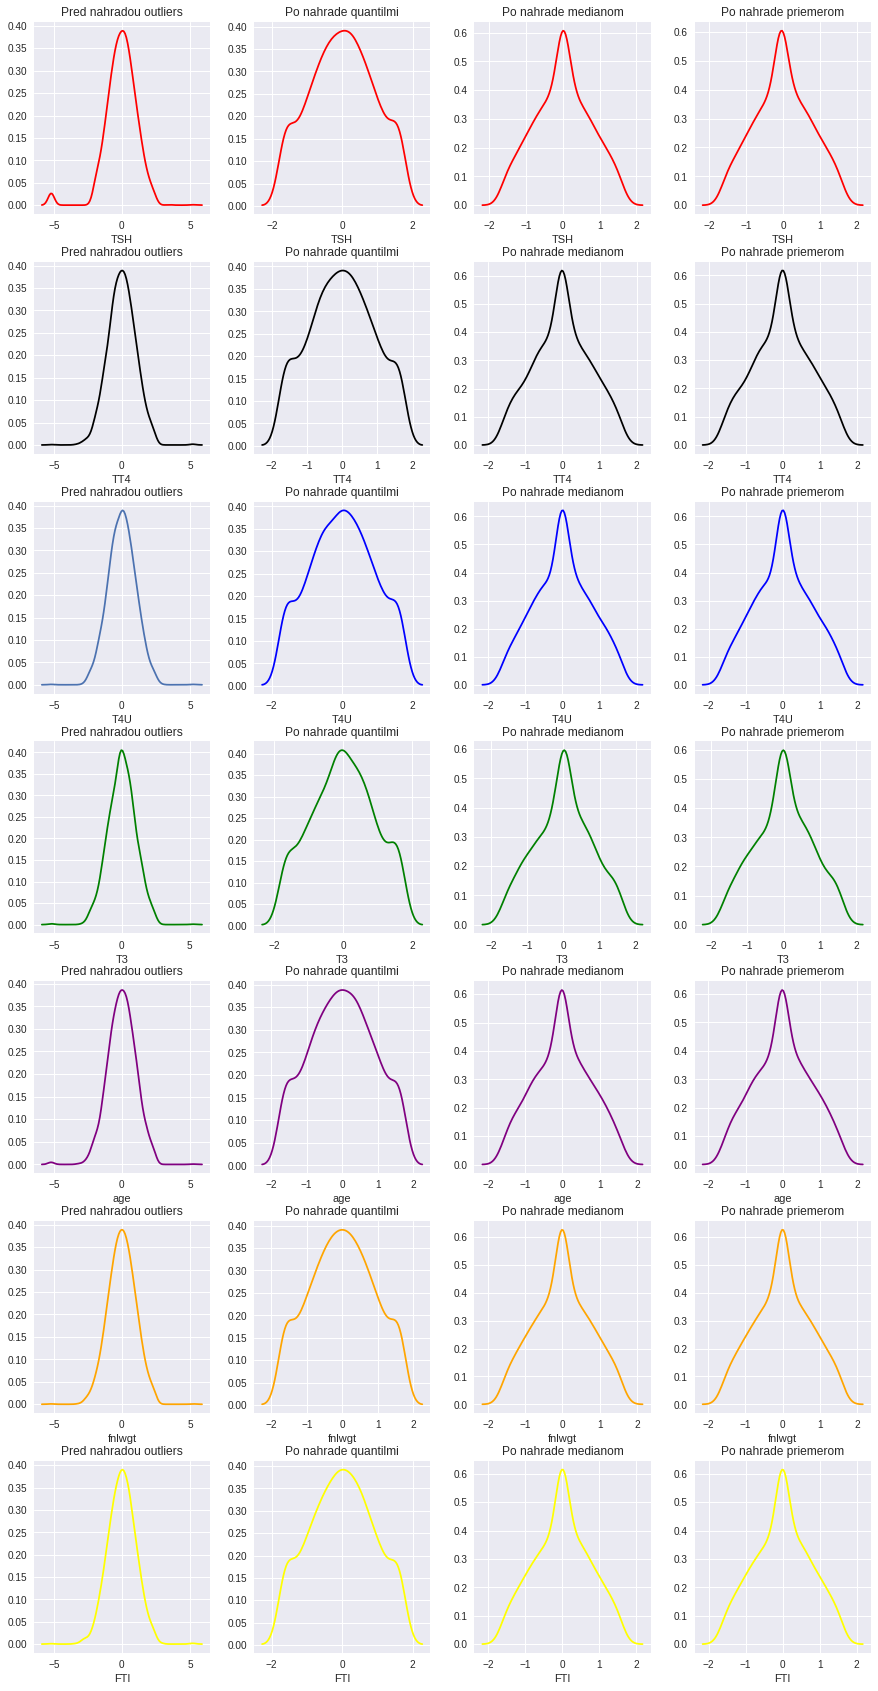

In [0]:
f, axes = plt.subplots(7, 4, figsize=(15, 30), sharex=False,sharey=False)
col = ['TSH','TT4','T4U','T3','age','fnlwgt','FTI']
colors = ['red','black','blue','green','purple','orange','yellow']
for i in range(7):
  axes[i,0].set_title('Pred nahradou outliers')
  axes[i,1].set_title('Po nahrade quantilmi')
  axes[i,2].set_title('Po nahrade medianom')
  axes[i,3].set_title('Po nahrade priemerom')
  merged3 = OutliersCorrectValue([col[i]],'quantile').fit_transform(merged2)
  sns.distplot(merged3[col[i]].dropna(),ax=axes[i,1],rug=False,hist =False,color = colors[i])
#  axes[i,1].set_title('Po boxcox a QuantileOutliersTransformacii ')
  merged3 = OutliersCorrectValue([col[i]],'median').fit_transform(merged2)
  sns.distplot(merged3[col[i]].dropna(),ax=axes[i,2],rug=False,hist =False,color = colors[i])
#  axes[i,1].set_title('Po boxCox a median Transformacii')
  merged3 = OutliersCorrectValue([col[i]],'mean').fit_transform(merged2)
  sns.distplot(merged3[col[i]].dropna(),ax=axes[i,3],rug=False,hist =False,color = colors[i])
  
f.subplots_adjust(hspace = 0.25,wspace = 0.25)
sns.distplot(merged2.TSH.dropna(),ax=axes[0,0],rug=False,hist =False,color = 'red')

sns.distplot(merged2.TT4.dropna(),ax=axes[1,0],rug=False,hist = False,color = 'black')

sns.distplot(merged2.T4U.dropna(),ax=axes[2,0],rug=False,hist = False)

sns.distplot(merged2.T3.dropna(),ax=axes[3,0],rug=False,hist = False,color='green')

sns.distplot(merged2.age.dropna(),ax=axes[4,0],rug=False,hist = False,color='purple')

sns.distplot(merged2.fnlwgt.dropna(),ax=axes[5,0],rug=False,hist = False,color='orange')
sns.distplot(merged2.FTI.dropna(),ax=axes[6,0],rug=False,hist = False,color='yellow')


**Velmi dobre vysledky ked outlierov nahradzame priemerom **



In [0]:
pipDef = Pipeline([
    ['SpojenieDatasetov',DatasetMerger(other_ds)],
    ['OpravenieBooleanASexAtributov',BooleanFormatCorrector(boolColWithSex)],
    ['OdstranenieTBG',ColumnsRemover(['TBG','TBG measured'])],
    ['ZmenaHodnotNaVelkePismena',CaseSensitiveFormatCorrector(['referral source'])],
    ['DatumNarodeniaDoJednotnehoFormatu',DateCorrector('date_of_birth')],
    ['RozparsovanieAtributuClass',ParseColumn(['class','className','classNumber'],['|'])],
    ['RozparsovanieAtributuPersonal_info',ParseColumn(['personal_info','occupation','personalState','marital-status','employmentSector','race'],['|','\n','--','|'])],
    ['RozparsovanieAtributuAddress',ParseColumn(['address','city','state'],['\n'])],
    ['RozparsovanieAtributustate',ParseColumn(['state','stateName','stateCode'],[','])],
    ['RozprarsovanieAtributuName',ParseColumn(['name','FirstName','LastName'],[' '])],
    ['OdstranenieDuplicit',Duplicit(['name','address'],'mean')],
    ['NahradenieNajcastejsouHodnotouvClastri-educationNum',MostFrequentInClusters(['education','education-num'],True)],
    ['VyplnenieAtributuPregnantMuzum',Pregnancy('M')],
    ['VyplnenieRodinnehoVztahuNaZakladeVztahu',MostFrequentInClusters(['relationship','marital-status'],False)],
    ['VyplneniePohlaviaPodlaKrstnehoMena',MostFrequentInClusters(['FirstName','sex'],False)],
    ['OdstranenieOtaznikovZciselnychAtributov',NumerValueFromObjecetToFloat(['FTI'])],
    ['Transformacia',PowerTrans(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],2,True,1000,10)],
    ['OdstranenieOutliers',OutliersCorrectValue(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],'mean')],    
])
merged = pipDef.fit_transform(personal_ds)

In [0]:
overview_func(merged)

## KNN calsification - doplnenie kategorickej hodnoty



In [0]:
class KnnClassifierImpute(TransformerMixin):
    def __init__(self,col,testSize,knn):
      self.xcol = col[:-1]
      self.ycol = col[-1]
      self.col = col
      self.testSize = testSize
      self.knn = knn
    def fit(self,X,y=None):
      self.ind = X.index
      for c in self.col: #zistim indexy z ktorych sa mozem ucit
        self.ind = X[X.index.isin(self.ind) & ~X[c].isnull()].index
      
      #vytvorim np.array pre Xove data
      #print(merged.loc[self.ind,self.xcol])
      xdata=np.array(X.loc[self.ind,self.xcol])
      ydata=np.array(X.loc[self.ind,self.ycol])
      #one hot encoder dat
      X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=self.testSize, random_state=42)
      self.Xencoder = ce.OneHotEncoder(use_cat_names = True,handle_unknown = 'ignore')
      X_train=self.Xencoder.fit_transform(X_train)
      X_test=self.Xencoder.transform(X_test)
      self.Yencoder = ce.OneHotEncoder(use_cat_names = True,handle_unknown='ignore')
      y_train=self.Yencoder.fit_transform(y_train)
      y_test = self.Yencoder.transform(y_test)
      self.ycolenc = y_test.columns
      #print(y_test)
      
      #print(X_train)
      self.regr = KNeighborsClassifier(n_neighbors=self.knn)
      self.regr.fit(X_train,y_train)
      
      #print(len(self.ind)," pocet dat na natrenovanie")
      prediction = self.regr.predict(X_test)
      prediction = pd.DataFrame(prediction,columns=y_test.columns)
      prediction = self.Yencoder.inverse_transform(prediction)
      y_test = self.Yencoder.inverse_transform(y_test)
      # The coefficients
      #print('Coefficients: \n', self.regr.coef_)
      # The mean squared error
      pocetspravnych = 0;
      for i in range(len(prediction[0])):
        if y_test[0].loc[i] == prediction[0].loc[i]:
          pocetspravnych = pocetspravnych +1
        else:
          print('spravna :',y_test[0].loc[i],' predikovana: ',prediction[0].loc[i])
          
      print("percentualna uspesnost:",(pocetspravnych/len(y_test)*100),"% pocetSpravnych :",pocetspravnych," vsetkych ",len(y_test))
      return self
    
    def transform(self,dataset):
      ds = dataset.copy()
      self.ind = ds.index
      for c in self.xcol: #zistim indexy z ktorych sa mozem ucit
        self.ind = ds[ds.index.isin(self.ind) & ~ds[c].isnull()].index
      self.ind = ds[ds.index.isin(self.ind) & ds[self.ycol].isnull()].index
      xdata=np.array(ds.loc[self.ind,self.xcol])
      print(len(self.ind),":pocet riadkov na vyplnenie")
      #print(dataset.loc[self.ind,'pregnant'])
      xdata = self.Xencoder.transform(xdata)
      y_result = self.regr.predict(xdata)
      y_result = pd.DataFrame(y_result,columns=self.ycolenc)
      y_resultPd = self.Yencoder.inverse_transform(y_result)
      #print(y_resultPd[0].unique())
      ds.loc[self.ind,self.ycol] = np.array(y_resultPd[0])
     # print(ds.loc[self.ind,'pregnant'])
     # print(ds.pregnant.value_counts())
      return ds

##Linear reggresion

In [0]:
class LinearRegressionImpute(TransformerMixin):
    def __init__(self,col,testSize):
      self.xcol = col[:-1]
      self.ycol = col[-1]
      self.col = col
      self.testSize = testSize
      
    def fit(self,X,y=None):
      self.ind = X.index
      for c in self.col: #zistim indexy z ktorych sa mozem ucit
        self.ind = X[X.index.isin(self.ind) & ~X[c].isnull()].index
      
      #vytvorim np.array pre Xove data
      #print(merged.loc[self.ind,self.xcol])
      xdata=np.array(X.loc[self.ind,self.xcol])
      ydata=np.array(X.loc[self.ind,self.ycol])
      X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=self.testSize, random_state=42)
      
      self.Xencoder = ce.OneHotEncoder(use_cat_names = True,handle_unknown = 'ignore')
      X_train=self.Xencoder.fit_transform(X_train)
      X_test=self.Xencoder.transform(X_test)
#       self.Yencoder = ce.OneHotEncoder(use_cat_names = True,handle_unknown='ignore')
#       y_train=self.Yencoder.fit_transform(y_train)
#       y_test = self.Yencoder.transform(y_test)
#       self.ycolenc = y_test.columns
      
      
      self.regr = linear_model.LinearRegression()
      self.regr.fit(X_train,y_train)
      y_pred = self.regr.predict(X_test)
      print(len(y_train)," pocet dat na natrenovanie")
      
      from sklearn.metrics import explained_variance_score
      print(explained_variance_score(y_test, y_pred))  
      
      #print(self.regr.score(X_test,y_test))
      return self
    
    def transform(self,data):
      ds = data.copy()
      self.ind = ds.index
      for c in self.xcol: #zistim indexy z ktorych sa mozem ucit
        self.ind = ds[ds.index.isin(self.ind) & ~ds[c].isnull()].index
      self.ind = ds[ds.index.isin(self.ind) & ds[self.ycol].isnull()].index
      
      xdata=np.array(ds.loc[self.ind,self.xcol])
      xdata = self.Xencoder.transform(xdata)
      y_result = self.regr.predict(xdata)
      #print(y_result)
      print(len(self.ind)," pocet riadkov ktore vyplnime")
      ds.loc[self.ind,self.ycol] = y_result
      return ds
      
      
      

##KNN regression

In [0]:
class KNeighboardsRegressionImpute(TransformerMixin):
    def __init__(self,col,testSize,kn):
      self.xcol = col[:-1]
      self.ycol = col[-1]
      self.col = col
      self.kn = kn
      self.testSize = testSize
      
    def fit(self,X,y=None):
      self.ind = X.index
      for c in self.col: #zistim indexy z ktorych sa mozem ucit
        self.ind = X[X.index.isin(self.ind) & ~X[c].isnull()].index
      
      #vytvorim np.array pre Xove data
      #print(merged.loc[self.ind,self.xcol])
      xdata=np.array(X.loc[self.ind,self.xcol])
      ydata=np.array(X.loc[self.ind,self.ycol])
      X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=self.testSize, random_state=42)
      self.Xencoder = ce.OneHotEncoder(use_cat_names = True,handle_unknown = 'ignore')
      X_train=self.Xencoder.fit_transform(X_train)
      X_test=self.Xencoder.transform(X_test)

      regr = KNeighborsRegressor(self.kn)
      regr.fit(X_train,y_train)
      y_pred = regr.predict(X_test)
      print(len(y_train)," pocet dat na natrenovanie")
      
      from sklearn.metrics import explained_variance_score
      print(explained_variance_score(y_test, y_pred)) 
      from sklearn.metrics import mean_squared_error
      print(mean_squared_error(y_test, y_pred),'MAR eroor') 
      self.score = regr.score(X_test,y_test)
      print(self.score)
      self.regr = regr
     # for i in range(len(y_pred)):
     #   print('Ocakavana',y_test[i],' Predikovana :',y_pred[i])
        
      return self
    
    def transform(self,data):
      ds=data.copy()
      self.ind = ds.index
      for c in self.xcol: #zistim indexy z ktorych sa mozem ucit
        self.ind = ds[ds.index.isin(self.ind) & ~ds[c].isnull()].index
      self.ind = ds[ds.index.isin(self.ind) & ds[self.ycol].isnull()].index
      xdata=np.array(ds.loc[self.ind,self.xcol])
      xdata=self.Xencoder.transform(xdata)
      y_result = self.regr.predict(xdata)
      print(len(self.ind)," pocet riadkov ktore vyplnime")
      ds.loc[self.ind,self.ycol] = y_result
      return ds
      

##fancyImputer

In [0]:
class fancyIterativeImputer(TransformerMixin):
  def __init__(self,col):
    self.col = col
  def fit(self,X,y=None):
    X_incomplete = np.array(X[self.col])
    self.k = IterativeImputer()
    self.k.fit(X_incomplete)
    return self
    
  def t(self,x):
    return self.k.transform(x)
  def transform(self,data):
    ds=data.copy()
    X_incomplete = np.array(ds[self.col])
    mat = self.t(X_incomplete)
    ds[self.col]=mat
    return ds

In [0]:
merged2 = fancyIterativeImputer(['TSH','TT4','T4U','T3','age','fnlwgt','FTI']).fit_transform(merged)

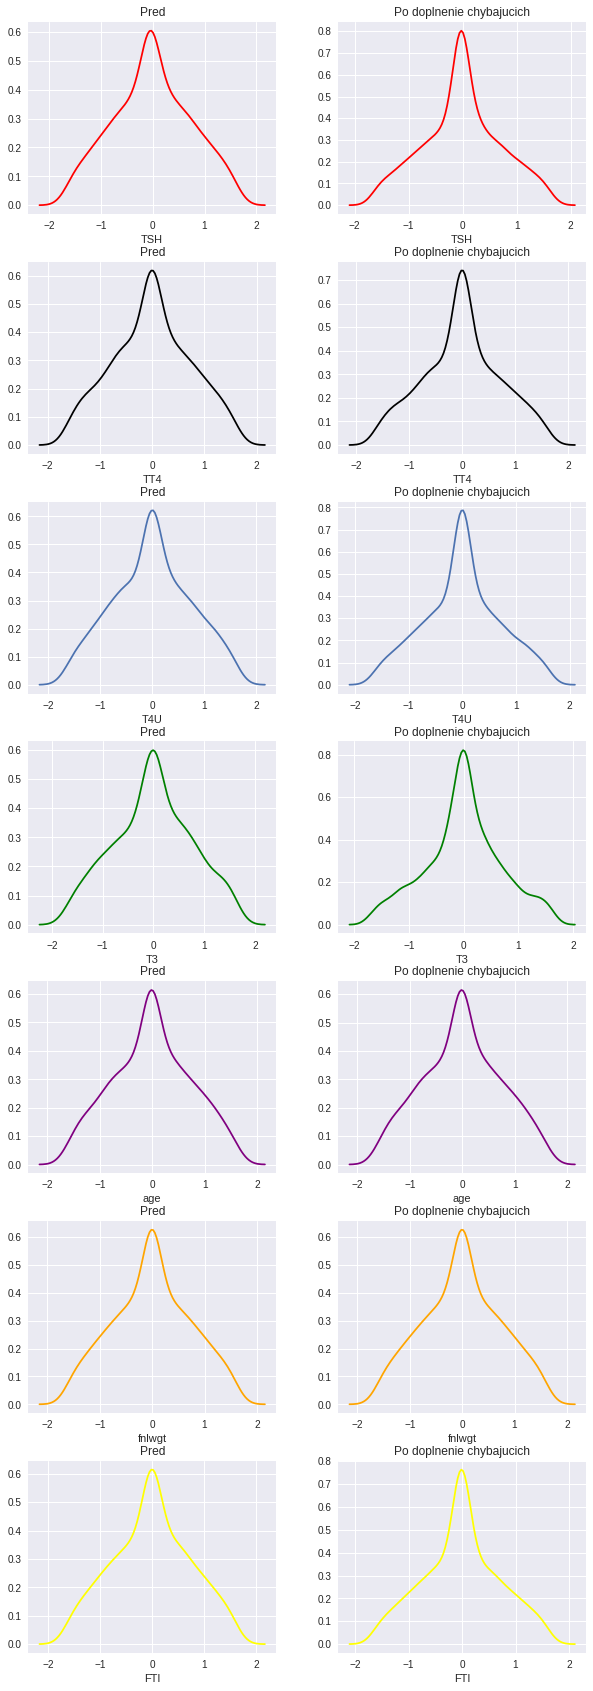

In [0]:
f, axes = plt.subplots(7, 2, figsize=(10, 30), sharex=False,sharey=False)
col = ['TSH','TT4','T4U','T3','age','fnlwgt','FTI']
colors = ['red','black','blue','green','purple','orange','yellow']
for i in range(7):
  axes[i,0].set_title('Pred')
  axes[i,1].set_title('Po doplnenie chybajucich')

f.subplots_adjust(hspace = 0.25,wspace = 0.25)
sns.distplot(merged.TSH.dropna(),ax=axes[0,0],rug=False,hist =False,color = 'red')

sns.distplot(merged.TT4.dropna(),ax=axes[1,0],rug=False,hist = False,color = 'black')

sns.distplot(merged.T4U.dropna(),ax=axes[2,0],rug=False,hist = False)

sns.distplot(merged.T3.dropna(),ax=axes[3,0],rug=False,hist = False,color='green')

sns.distplot(merged.age.dropna(),ax=axes[4,0],rug=False,hist = False,color='purple')

sns.distplot(merged.fnlwgt.dropna(),ax=axes[5,0],rug=False,hist = False,color='orange')
sns.distplot(merged.FTI.dropna(),ax=axes[6,0],rug=False,hist = False,color='yellow')



sns.distplot(merged2.TSH.dropna(),ax=axes[0,1],rug=False,hist =False,color = 'red')

sns.distplot(merged2.TT4.dropna(),ax=axes[1,1],rug=False,hist = False,color = 'black')

sns.distplot(merged2.T4U.dropna(),ax=axes[2,1],rug=False,hist = False)

sns.distplot(merged2.T3.dropna(),ax=axes[3,1],rug=False,hist = False,color='green')

sns.distplot(merged2.age.dropna(),ax=axes[4,1],rug=False,hist = False,color='purple')

sns.distplot(merged2.fnlwgt.dropna(),ax=axes[5,1],rug=False,hist = False,color='orange')
sns.distplot(merged2.FTI.dropna(),ax=axes[6,1],rug=False,hist = False,color='yellow')

**Nahradenie dalsich kategorickych hodnot podla zoznamu** 

---

Vo vsetkych vyznamnejsich atributov chyba 1 hodnota
Pri pohlavi chybalo 144 no na zaklade krstneho mena sa nam podarilo doplnit 99 a ostatnych musime doplnit pomocou najcastejsej hodnoty  taktiez aj vsetky ostatne ktore nebudu mat pre nasu predikciu zasadny vyznam
```
['FTI measured','lithium','capital-gain','goitre','query on thyroxine','sex','personalState','stateCode']
```



In [0]:
class MostFreqFill(TransformerMixin):
  def __init__(self,col):
    self.col = col
  def fit(self, x, y=None):
    return self
  
  def transform(self,data):
    ds=data.copy()
    for a in self.col:
      mFv = ds[a].value_counts().index[0]
      ds.loc[ds[a].isnull(),a] = mFv
    return ds


 **Date_of_birth**
 
---


Vek sme doplnili fancyImputerom teraz na zaklade veku doplnime datum narodenia ku dnu 28.10.2018
pretoze podla prvotnej analyzy sme prisli na to ze datum narodenia sa pocital vzhladom na dva datumu jeden v roku 2017 a druhy v roku 2018

In [0]:
class FillDate(TransformerMixin):
  def __init__(self,col):
    self.col = col
  def fit(self, x, y=None):
    return self
  
  def transform(self,data):
    ds=data.copy()
    ind = ds[ds[self.col].isnull()].index
    for i in ind:
      ds.loc[i,self.col] = datetime(2018,10,28).replace(year = datetime(2018,10,28).year-ds.loc[i])
    return ds

In [0]:

pipDef = Pipeline([
    ['SpojenieDatasetov',DatasetMerger(other_ds)],
    ['OpravenieBooleanASexAtributov',BooleanFormatCorrector(boolColWithSex)],
    ['OdstranenieTBG',ColumnsRemover(['TBG','TBG measured'])],
    ['ZmenaHodnotNaVelkePismena',CaseSensitiveFormatCorrector(['referral source'])],
    ['DatumNarodeniaDoJednotnehoFormatu',DateCorrector('date_of_birth')],
    ['RozparsovanieAtributuClass',ParseColumn(['class','className','classNumber'],['|'])],
    ['RozparsovanieAtributuPersonal_info',ParseColumn(['personal_info','occupation','personalState','marital-status','employmentSector','race'],['|','\n','--','|'])],
    ['RozparsovanieAtributuAddress',ParseColumn(['address','city','state'],['\n'])],
    ['RozparsovanieAtributustate',ParseColumn(['state','stateName','stateCode'],[','])],
    ['RozprarsovanieAtributuName',ParseColumn(['name','FirstName','LastName'],[' '])],
    ['OdstranenieDuplicit',Duplicit(['name','address'],'mean')],
    ['NahradenieNajcastejsouHodnotouvClastri-educationNum',MostFrequentInClusters(['education','education-num'],True)],
    ['VyplnenieAtributuPregnantMuzum',Pregnancy('M')],
    ['VyplnenieRodinnehoVztahuNaZakladeVztahu',MostFrequentInClusters(['relationship','marital-status'],False)],
    ['VyplneniePohlaviaPodlaKrstnehoMena',MostFrequentInClusters(['FirstName','sex'],False)],
    ['OdstranenieOtaznikovZciselnychAtributov',NumerValueFromObjecetToFloat(['FTI'])],
    ['Transformacia',PowerTrans(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],2,True,1000,10)],
    ['OdstranenieOutliers',OutliersCorrectValue(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'],'mean')],
    ['DoplnenieHodnotyTT4',LinearRegressionImpute(['FTI','TSH','T4U','pregnant','TT4'],0.1)], #60%uspesnost
    ['DoplnenieHodnotPomocouFancyImputer',fancyIterativeImputer(['TSH','TT4','T4U','T3','age','fnlwgt','FTI'])],
    ['OdstranenieNadbytocnychStlpcov',ColumnsRemover(['state','class','hypopituitary','personal_info'])],
    ['doplneniePodlaNajfrekventovanejsejHodnotyPreStlpec',MostFreqFill(['FTI measured','lithium','capital-gain','goitre','employmentSector','date_of_birth','query on thyroxine','sex','personalState','stateCode'])],
    ['DoplnenieKlasifikaciouPregnant',KnnClassifierImpute(['TSH','TT4','FTI','T3','pregnant'],0.1,5)], #100%testovacia uspesnost
    ['VyplnenieAtributuPregnantMuzum2',Pregnancy('M')],
    ['VyplnenieOccupationPodlaNajfrekventovanejsejHodnotyZlustrov',MostFrequentInClusters(['education','sex','occupation'],False)], #doplnenie ocupation podla najcastejsej hodnoty education
])
merged = pipDef.fit_transform(personal_ds)
overview_func(merged)

1598  pocet dat na natrenovanie
0.6178626728295948
1  pocet riadkov ktore vyplnime
spravna : False  predikovana:  True
spravna : True  predikovana:  False
percentualna uspesnost: 99.04761904761905 % pocetSpravnych : 208  vsetkych  210
143 :pocet riadkov na vyplnenie


,Columns,numbersOfNaValue,numbersOfRecords,type,numbersOfUniqueValue,uniqueValue,final
0,name,0,2237,object,2236,"[Lydia Phillips, Ken Anderson, Diane Watson, A...",True
1,address,0,2237,object,2237,"[698 Melton Divide Suite 651\nCookbury, SC 452...",True
2,query hyperthyroid,0,2237,object,2,"[False, True]",True
3,T4U measured,0,2237,object,2,"[True, False]",True
4,FTI measured,0,2237,object,2,"[True, False]",True
5,education,0,2237,object,16,"[ Some-college, HS-grad, 12th, Bachelors, ...",True
6,lithium,0,2237,object,2,"[False, True]",True
7,TT4,0,2237,float64,251,"[-0.8344270065319033, -0.3219708901819884, 1.2...",True
8,T4U,0,2237,float64,296,"[0.0, -1.2206403488473496, 7.286572528096353e-...",True
9,capital-loss,0,2237,float64,38,"[0.0, 2377.0, 1564.0, 1887.0, 1719.0, 2057.0, ...",True


Nahradenie dalsich kategorickych hodnot 

**Priklad spatnej transformacie dat **

---



In [0]:
q = pipDef.get_params(True)
q = q.get('Transformacia')
c=q.boxcox.age.loc[0].inverse_transform(np.array(merged.age).reshape(-1,1))
stats.describe(c)

DescribeResult(nobs=2237, minmax=(array([20.]), array([79.])), mean=array([52.09125127]), variance=array([245.28574429]), skewness=array([-0.26632747]), kurtosis=array([-0.91651123]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02376218d0>,
      dtype=object)

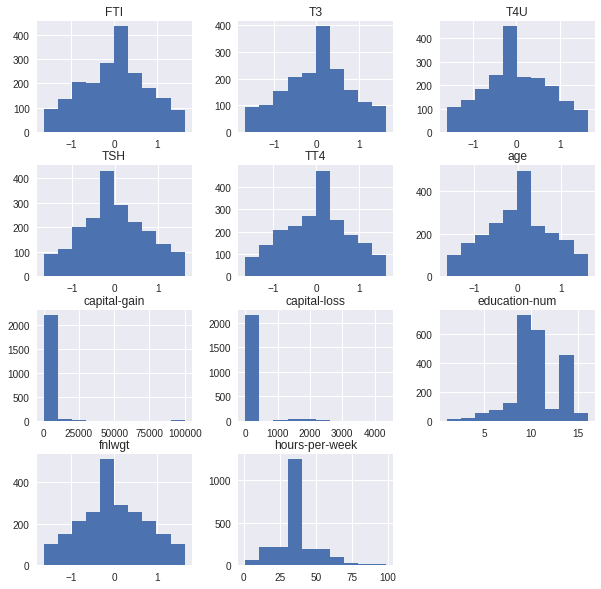

In [0]:
merged.hist(figsize=[10,10])